In [1]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt

os.chdir("../../")
cwd = os.getcwd()
from src.onlinedgp.utils import get_random_state
random_state = get_random_state()

In [2]:
Dx = 1
Dz = 2
Dy = 2
N = 10000
X = random_state.normal(0, 6, (N, Dx))
Z = []
Y = []

A1 = random_state.normal(0, 1, (Dx, Dx))
B1 = random_state.normal(0, 1, (Dx, Dx))

A2 = random_state.normal(0, 1, (Dy, Dz))
B2 = random_state.beta(1, 1, (Dy, Dz))
print(A1)
print(B1)
print(A2)
print(B2)

[[1.0847464]]
[[0.74569073]]
[[ 2.34669876 -0.34229291]
 [-1.61913436  0.80049529]]
[[0.54795874 0.49439586]
 [0.10351779 0.25675212]]


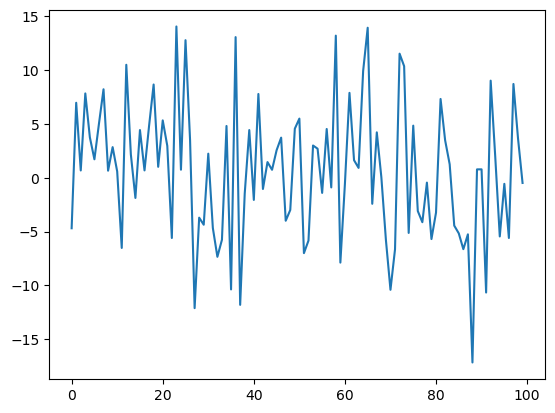

In [3]:
plt.plot(X[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case4", "x.png"))

In [4]:
def z_process(x):
    z = 0.5 * np.dot(A1, x) + np.sin(np.dot(B1, x))
    z = [np.sin(z[0]), np.cos(z[0])]
    z = z + np.random.normal(0., 0.01, Dz)
    return z

def generate_z_process(T):
    for t in range(T):
        z_next = z_process(X[t, :])
        Z.append(z_next)

In [5]:
generate_z_process(N)
Z = np.array(Z)

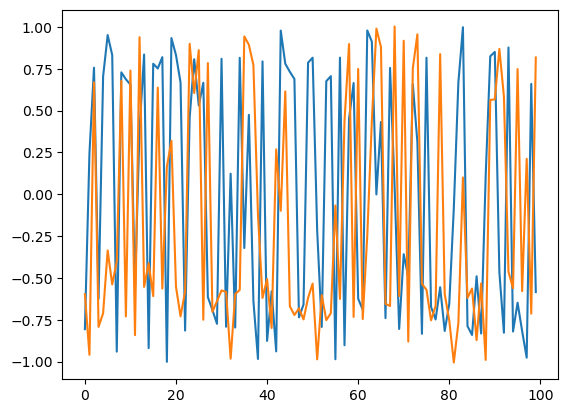

In [6]:
plt.plot(Z[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case4", "z.png"))

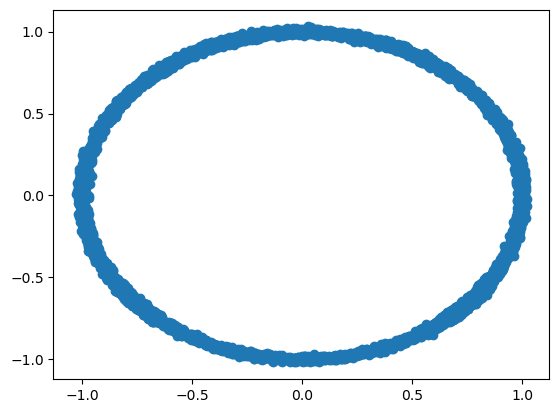

In [7]:
plt.scatter(Z[:,0], Z[:,1])

In [8]:
def y_process(x):
    y = 1 / (1 + np.exp(-x))
    y = [1 if j > 0.5 else 0 for j in y]
    return y

def generate_y_process(T):
    for t in range(T):
        y_next = y_process(Z[t, :])
        Y.append(y_next)

In [9]:
generate_y_process(N)
Y = np.array(Y)

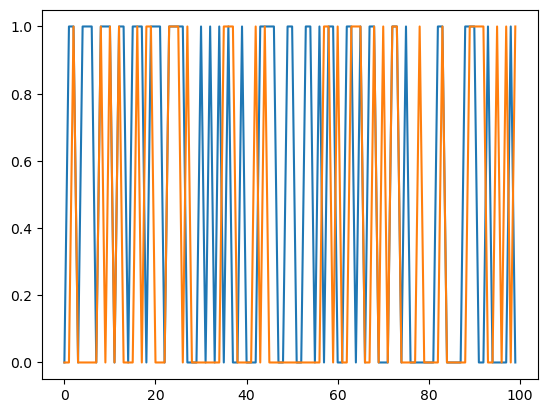

In [10]:
plt.plot(Y[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case4", "y.png"))

In [11]:
cwd = os.getcwd()
Y_path = os.path.join(cwd, "folds", "train_4_fold_1_Y.txt")
np.savetxt(Y_path, Y)

In [12]:
cwd = os.getcwd()
X_path = os.path.join(cwd, "folds", "train_4_fold_1_X.txt")
np.savetxt(X_path, X)

In [13]:
Z_path = os.path.join(cwd, "folds", "train_4_fold_1_Z.pickle")
with open(Z_path, 'wb') as f:
    pickle.dump([Z], f)